# Algo trading based only on the Simple Moving Average
> Whether you should buy above or below the SMA



### Written Summer 2019. Refactored in summer 2021, damn my code was bad. 

Note `df2 = dataset.iloc[ : :20, :] # every 20th, all columns`, this is on a (apx.) monthly basis, as there are (apx.) 20 trading days a month.. use `consider_every_Nth_day`

I am assuming fractional shares, this doesnt matter much which you can invest every day (pay check) and the stock price is low

In [1]:
consider_every_Nth_day = 1 # 20 
invPerTimePeriod = 1000 / 20 # ration your 1000 per month every day
STOCK = 'SPY'

In [2]:
# Importing the libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = yf.download(STOCK, "2003-3-14") #, start="2017-01-01"
df = df.drop(columns=['Open','High', 'Low','Adj Close','Volume'])
df.head()


[*********************100%***********************]  1 of 1 completed


,Close
Date,
2003-03-14,84.129997
2003-03-17,86.779999
2003-03-18,87.290001
2003-03-19,87.959999
2003-03-20,88.150002


In [4]:
df = df.iloc[ : :consider_every_Nth_day, :] # every 20th, all columns
df.head()

,Close
Date,
2003-03-14,84.129997
2003-03-17,86.779999
2003-03-18,87.290001
2003-03-19,87.959999
2003-03-20,88.150002


## Dollar cost averaging, like a boomer, `base_strategy`

In [5]:
base_strategy = 0 # Total base strategy

money = 0
shares = 0 

for i, row in df.iterrows():
    # print("\n" + str(i) +" | "+ str(row.Close.round(2)))
    money += invPerTimePeriod
    numShares = money/row.Close
    shares += numShares
    money -= (numShares * row.Close)
        
    # print("numShares:" , numShares)
    # print("shares:" , shares)
    # print("invPerTimePeriod:" , invPerTimePeriod)

value_of_shares_at_end = df.tail(1).Close.values[0]*shares
base_strategy = round(value_of_shares_at_end+money, 2)
print(f"Money left: {money}")
print(f"Numb of shares: {shares:.2f}")
print(f"Shares + Money {value_of_shares_at_end+money:.2f}")


Money left: 0.0
Numb of shares: 1524.26
Shares + Money 654001.00


## Buying below the Nth SMA

In [16]:
def simulate_buying_below_ma(window=3, below=True):
    df['MA'] = df.Close.rolling(window=window).mean().fillna(df.Close[0])
    
    money = 0
    shares = 0 

    for i, row in df.iterrows():
        money += invPerTimePeriod

        diff = row.Close - row.MA
        if (below and diff < 0) or (not below and diff >= 0):
            numShares = money/row.Close
            shares += numShares
            money -= (numShares * row.Close)
              
        # print("numShares:" , numShares)
        # print("shares:" , shares)
        # print("invPerTimePeriod:" , invPerTimePeriod)

    value_of_shares_at_end = df.tail(1).Close.values[0]*shares

    # reduced printing
    if value_of_shares_at_end + money - base_strategy > 0:
        print(f'Window size is {window}')
        print(f"Money left: {money}")
        if shares == 0: print(f"Numb of shares: {shares:.2f}")
        print(f"Shares + Money {value_of_shares_at_end+money:.2f}")
        print(f'Improvement over base_strategy: {value_of_shares_at_end + money - base_strategy:.2f}')
        print(f'===================================\n')

In [18]:
print(f'Total with base_strategy: {base_strategy:.2f}')
simulate_buying_below_ma(0)
simulate_buying_below_ma(1)
simulate_buying_below_ma(4)
simulate_buying_below_ma(8)
simulate_buying_below_ma(12)
simulate_buying_below_ma(16)


simulate_buying_below_ma(20)
simulate_buying_below_ma(30)
simulate_buying_below_ma(45)
simulate_buying_below_ma(60)
simulate_buying_below_ma(90)
simulate_buying_below_ma(180)
simulate_buying_below_ma(360)
simulate_buying_below_ma(720)

Total with base_strategy: 654001.00
Window size is 4
Money left: 50.0
Shares + Money 654397.49
Improvement over base_strategy: 396.49

Window size is 8
Money left: 50.0
Shares + Money 654607.88
Improvement over base_strategy: 606.88

Window size is 12
Money left: 50.0
Shares + Money 654089.94
Improvement over base_strategy: 88.94



## What about buying above the Nth SMA

In [25]:
simulate_buying_below_ma(0, below=False)
simulate_buying_below_ma(1, below=False)
simulate_buying_below_ma(10, below=False)
simulate_buying_below_ma(20, below=False)
simulate_buying_below_ma(30, below=False)
simulate_buying_below_ma(45, below=False)
simulate_buying_below_ma(60, below=False)
simulate_buying_below_ma(90, below=False)
simulate_buying_below_ma(180, below=False)
simulate_buying_below_ma(360, below=False)
simulate_buying_below_ma(720, below=False)

Window size is 90
Money left: 1050.0
Shares + Money 657893.20
Improvement over base_strategy: 3892.20



## Who would have imagined its better than buy and hold, if you buy exclusively above the 90-day Moving Average

<AxesSubplot:title={'center':"SPY and it's 90-day Moving Average"}, xlabel='Date', ylabel='Price'>

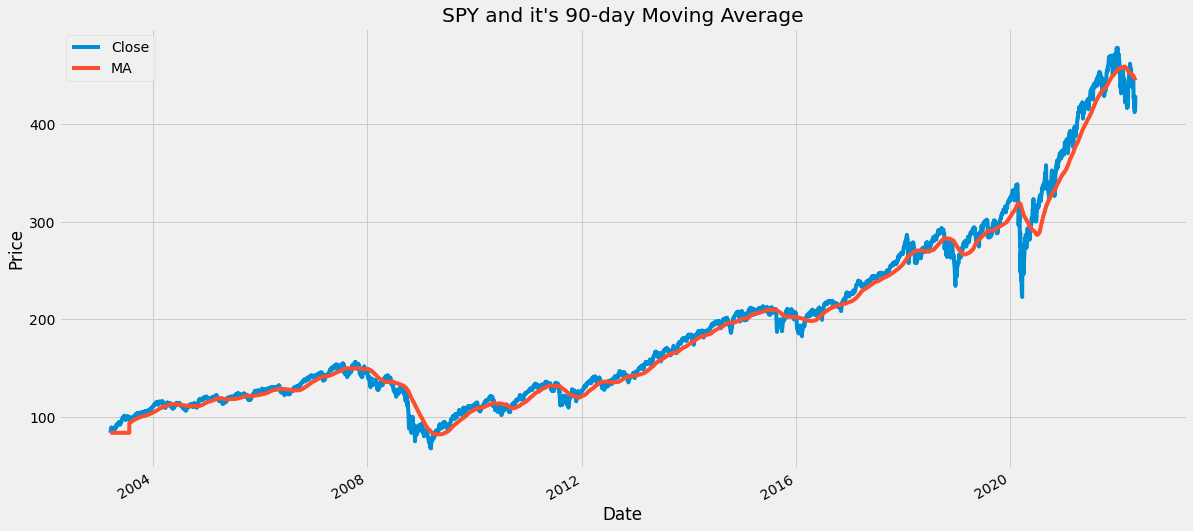

In [24]:
window = 90
df['MA'] = df.Close.rolling(window=window).mean().fillna(df.Close[0])
df.plot(figsize=(18,9), linewidth=4, title=f"{STOCK} and it's {window}-day Moving Average", ylabel="Price")